# Библиотеки

In [ ]:
import gdown
import os
import  requests, zipfile
from collections import Counter
import cv2
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
from PIL import Image
from numpy.lib.function_base import copy
import random
import glob

# Загрузка изображений

In [ ]:
# Подключение Google Диска

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qo -x  "/content/drive/MyDrive/stajirovka/датсеты/3000-3099.zip" -d /content/img # Код, без информационных файлов"

In [ ]:
# Путь к папке с изображениями
folder_path = '/content/img'
# Получаем список файлов в директории
files = os.listdir(folder_path)
# Составляем список путей к файлам
files_paths = [os.path.join(folder_path, file) for file in files]

files_paths.sort()
print(len(files_paths))
files_paths[2]

100


'/content/img/3002.png'

# Выбор некачественного изображения

(3508, 2550)


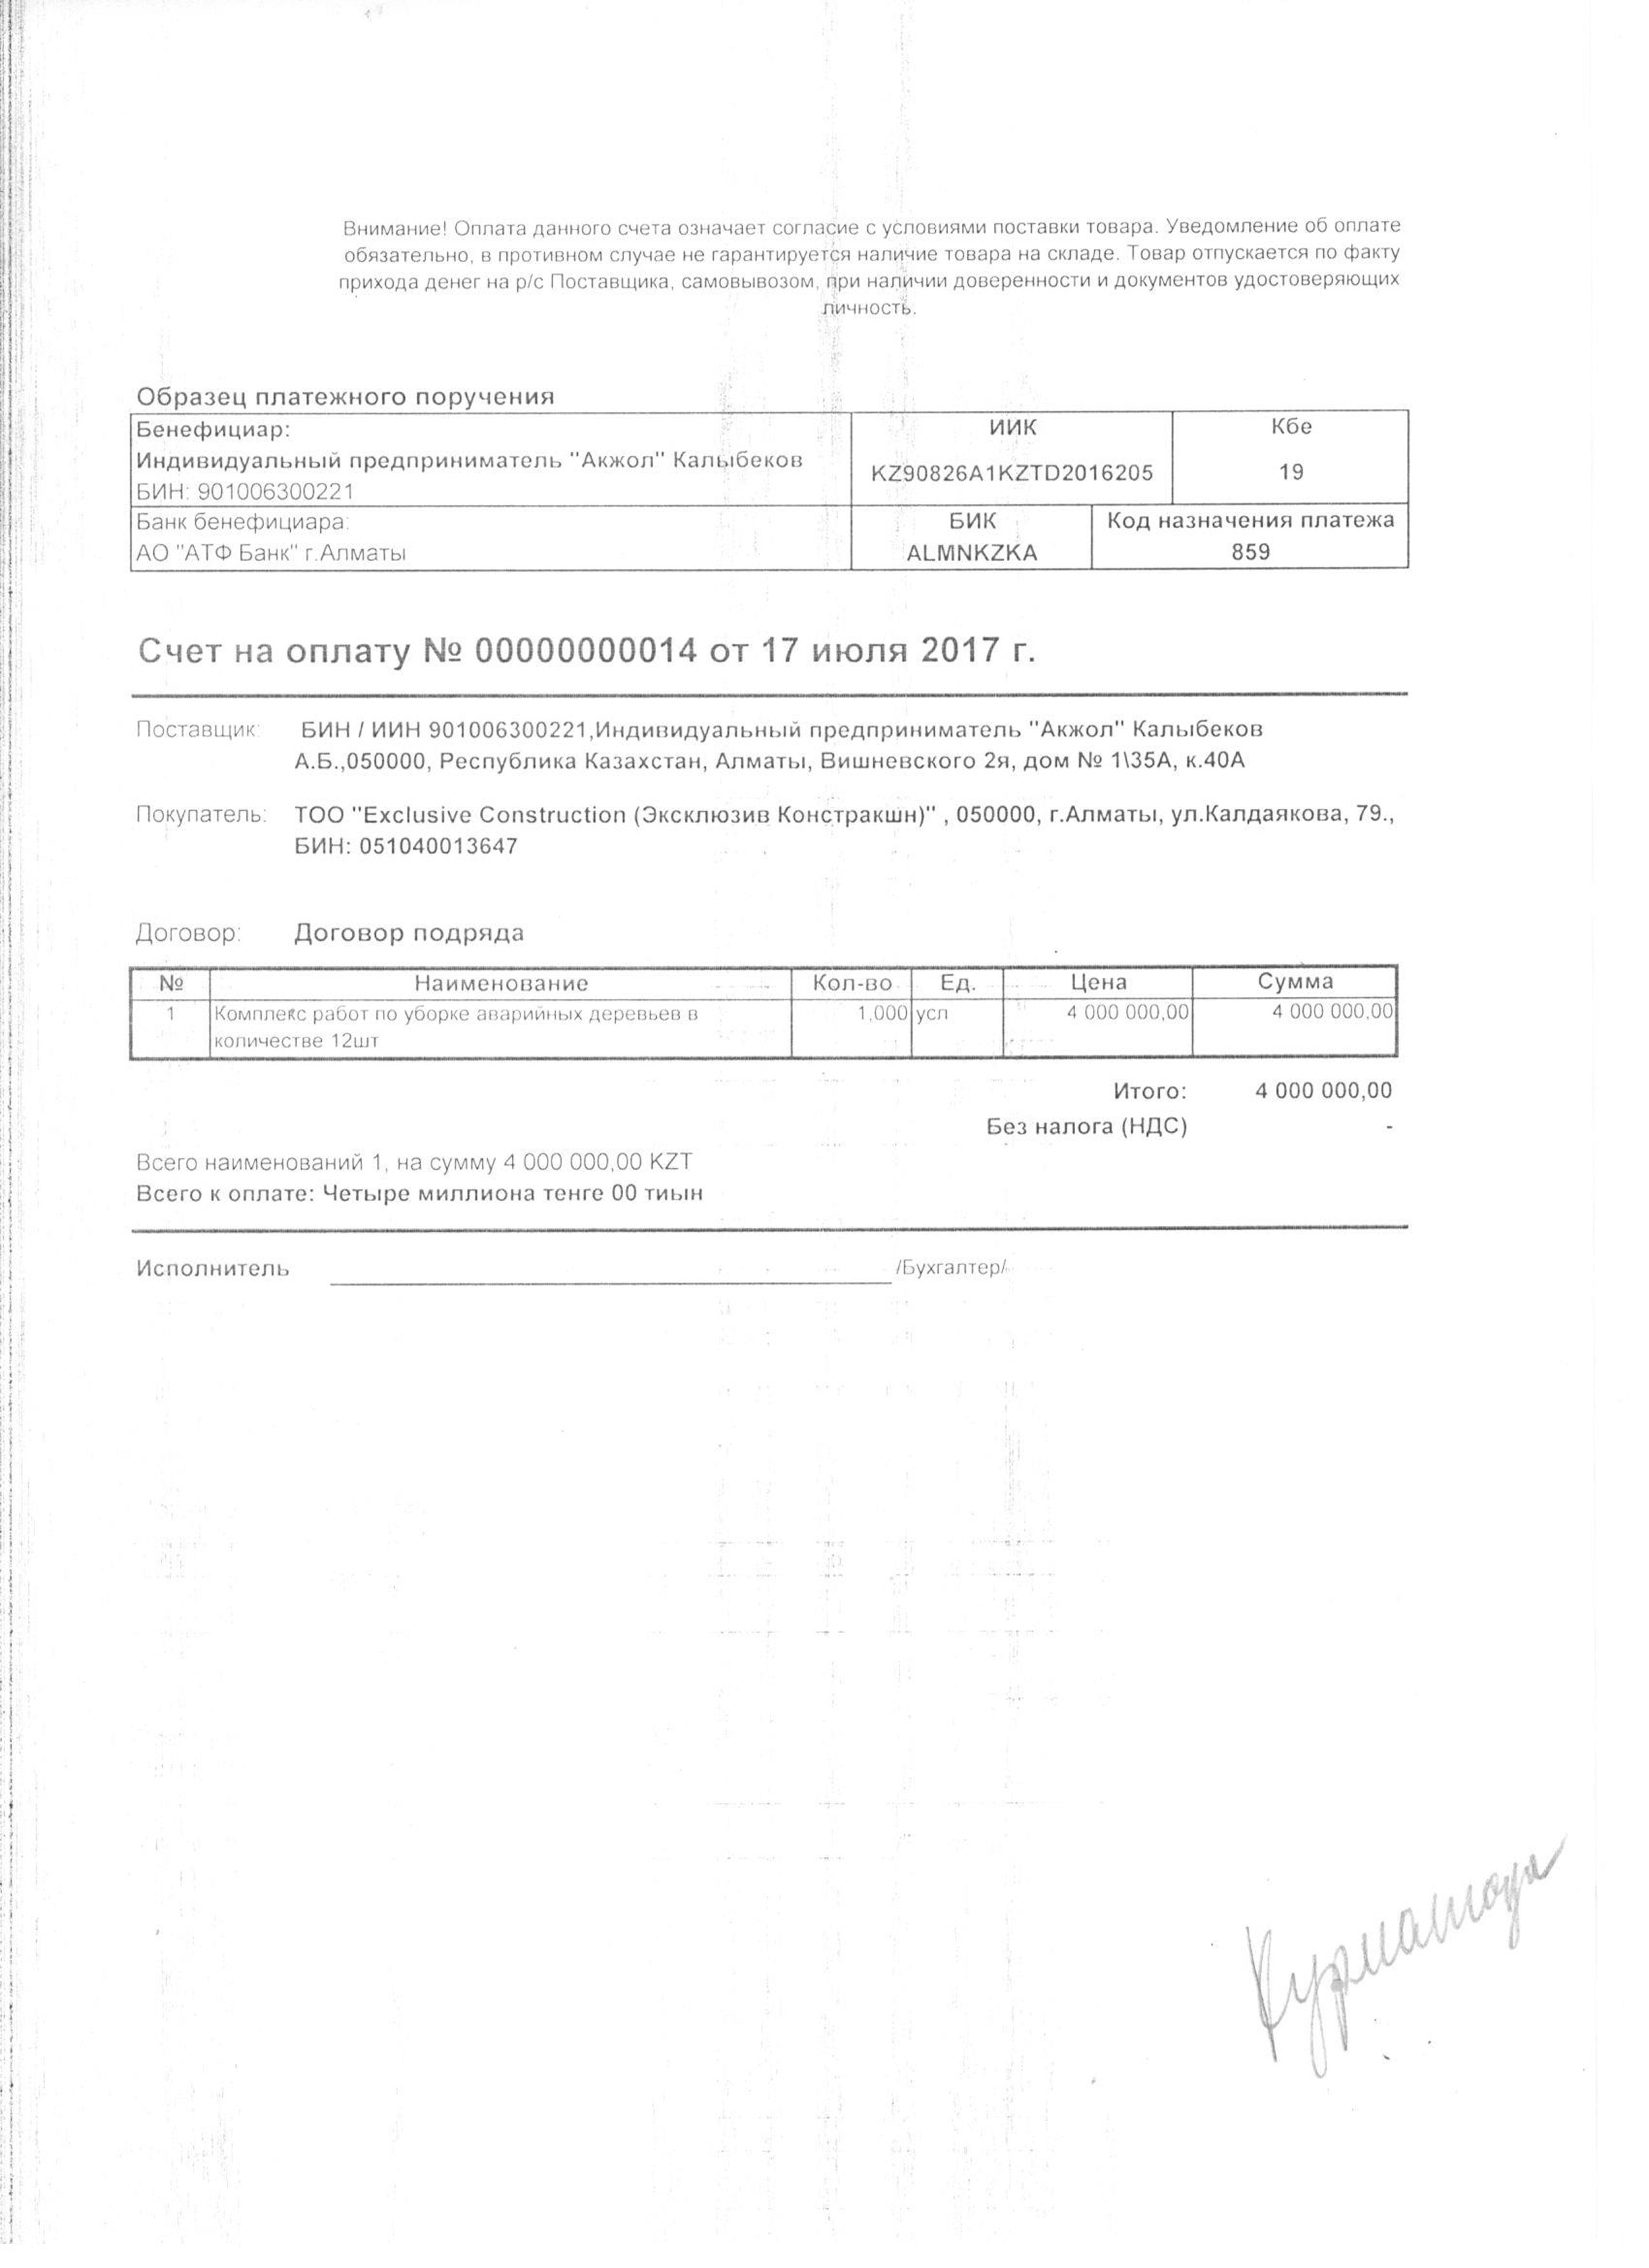

In [ ]:
image = cv2.imread('/content/img/3068.png', cv2.IMREAD_GRAYSCALE)# Начальное изображение
# Начальное изображение
print(image.shape)
cv2_imshow(image)

Вырежем часть  изображения для удобства просмотра

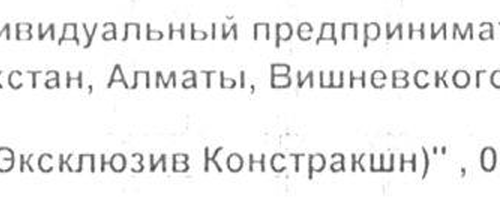

In [ ]:
image_crop = image[1100:1300, 1000:1500]
cv2_imshow(image_crop)

## cv2.THRESH_BINARY

cv2.THRESH_BINARY: если интенсивность пикселей превышает установленный порог, значение устанавливается равным 255, в противном случае устанавливается равным 0 (черный);

THRESH_BINARY


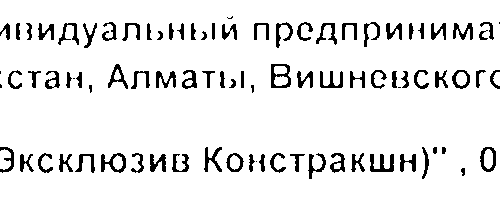

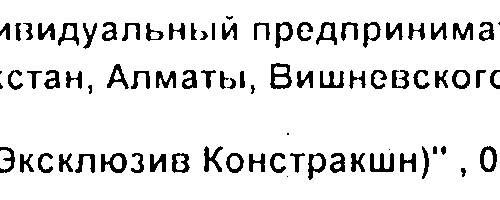

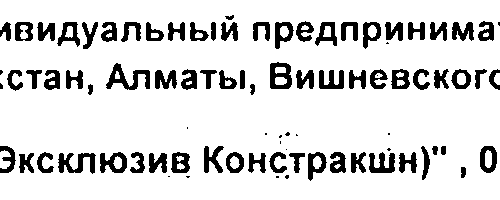

In [ ]:
# применение порогов
ret, thresh180 = cv2.threshold(image_crop, 180, 255, cv2.THRESH_BINARY)
ret, thresh200 = cv2.threshold(image_crop, 200, 255, cv2.THRESH_BINARY)
ret, thresh230 = cv2.threshold(image_crop, 230, 255, cv2.THRESH_BINARY)
thresh = [thresh180,thresh200,thresh230]
# вывод на экран
print('THRESH_BINARY')
cv2_imshow(thresh180)
cv2_imshow(thresh200)
cv2_imshow(thresh230)


## Erosion (эрозия) и dilation (расширение)

thresh180, kernel2


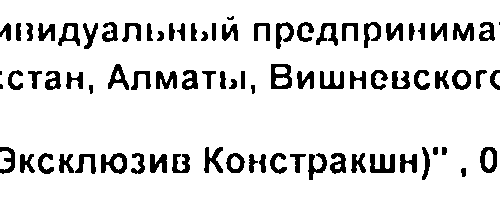

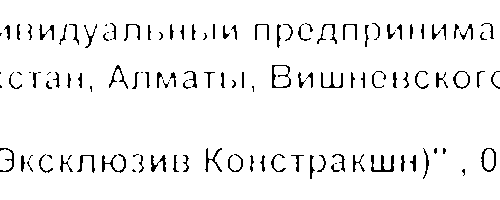

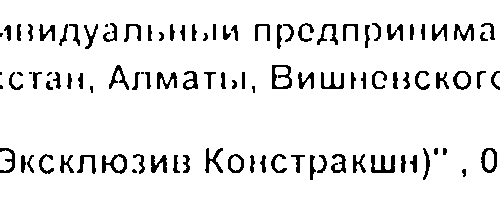

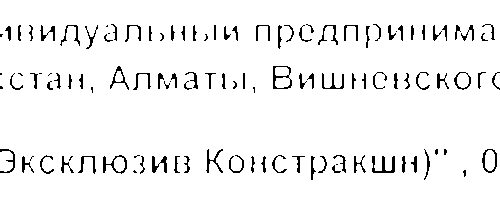

In [ ]:
# задаем значение ядра
kernel2 = np.full((2, 2), -1, np.uint8)
kernel3 = np.full((3, 3), -1, np.uint8)
kernel4 = np.full((4, 4), 1, np.uint8)
kernel_list = [kernel2,kernel3,kernel4]


# выполняем ЭРОЗИЮ
print('thresh180, kernel2')
imageERO = cv2.erode(thresh180, kernel2)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(thresh180, kernel2)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel2)

imageDIL_in_ero = cv2.dilate(imageERO, kernel2)
imageDIL_in_ero = cv2.dilate(imageDIL_in_ero, kernel2)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)
cv2.destroyAllWindows()


Лучший вариант эрозия после расширения

thresh200, kernel2


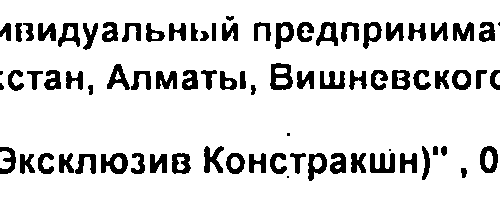

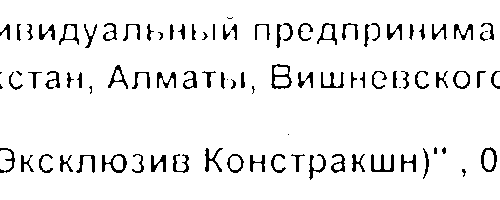

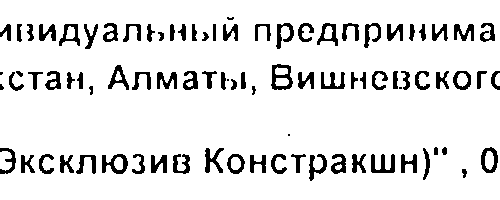

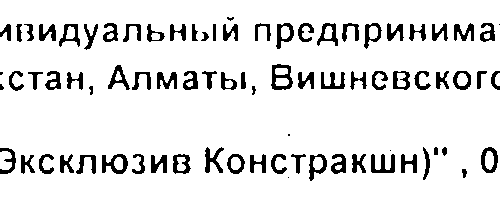

In [ ]:
# выполняем ЭРОЗИЮ
print('thresh200, kernel2')
imageERO = cv2.erode(thresh200, kernel2)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(thresh200, kernel2)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel2)
imageDIL_in_ero = cv2.dilate(imageERO, kernel2)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)

Лучший вариант эрозия после расширения

thresh230, kernel2


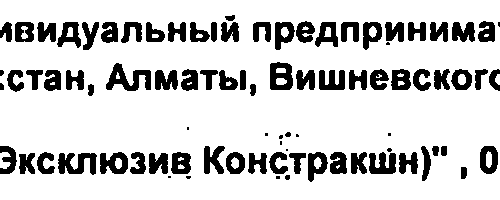

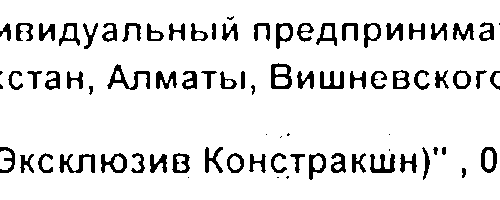

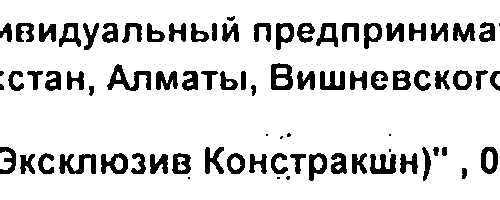

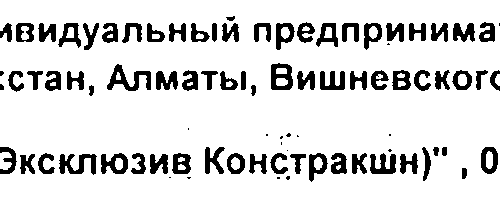

In [ ]:
# выполняем ЭРОЗИЮ
print('thresh230, kernel2')
imageERO = cv2.erode(thresh230, kernel2)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(thresh230, kernel2)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel2)
imageDIL_in_ero = cv2.dilate(imageERO, kernel2)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)

Лучший вариант эрозия после расширения

thresh180, kernel3


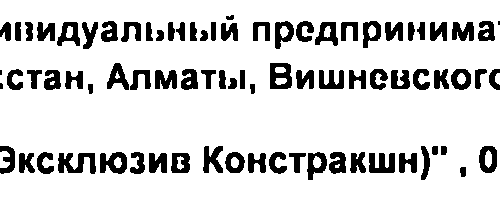

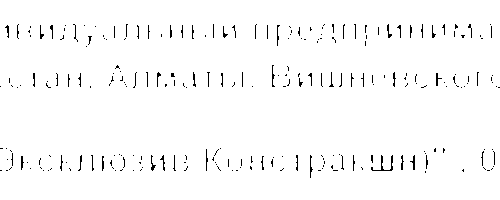

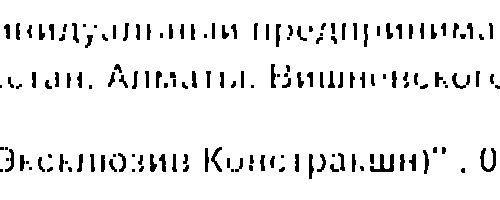

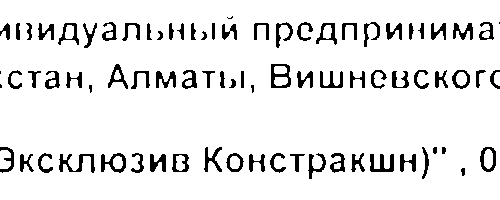

In [ ]:
# выполняем ЭРОЗИЮ
print('thresh180, kernel3')
imageERO = cv2.erode(thresh180, kernel3)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(thresh180, kernel3)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel3)
imageDIL_in_ero = cv2.dilate(imageERO, kernel3)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)

kernel3 - все хуже

thresh200, kernel3


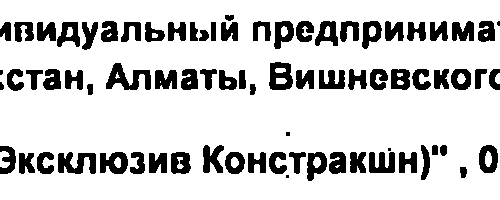

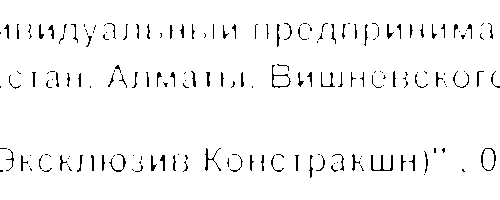

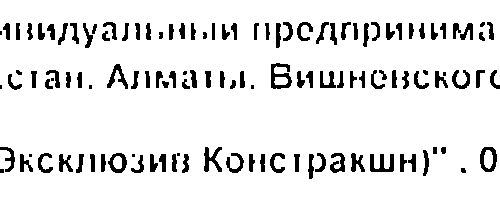

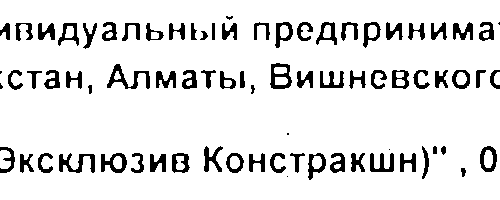

In [ ]:
# выполняем ЭРОЗИЮ
print('thresh200, kernel3')
imageERO = cv2.erode(thresh200, kernel3)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(thresh200, kernel3)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel3)
imageDIL_in_ero = cv2.dilate(imageERO, kernel3)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)

Буква В в слове индивидуальный негде не прописалось

## Пробуем с начала эрозию

image_crop kernel3


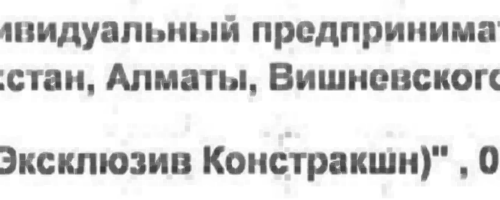

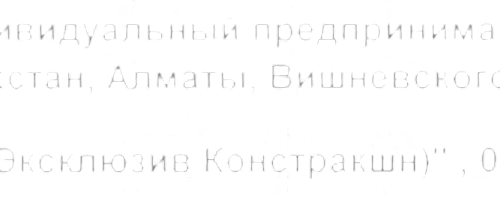

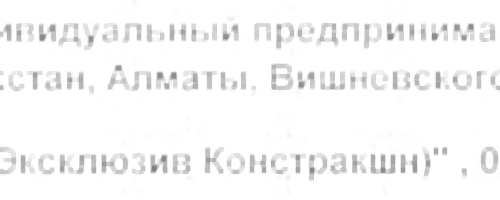

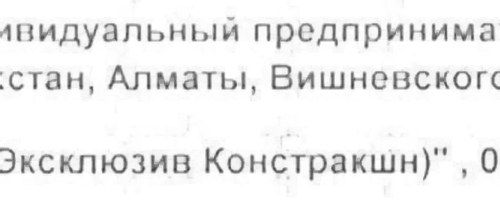

In [ ]:
# выполняем ЭРОЗИЮ
print('image_crop', 'kernel3')
imageERO = cv2.erode(image_crop, kernel4)
# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(image_crop, kernel4)
# вывод на экран изображения после расширения
cv2_imshow(imageDIL)
print()
# Пробуем эрозию после расширения и наоборот
imageERO_in_dil = cv2.erode(imageDIL, kernel4)
imageDIL_in_ero = cv2.dilate(imageERO, kernel4)
cv2_imshow(imageERO_in_dil)
print()
cv2_imshow(imageDIL_in_ero)

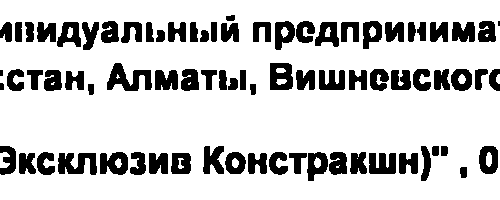

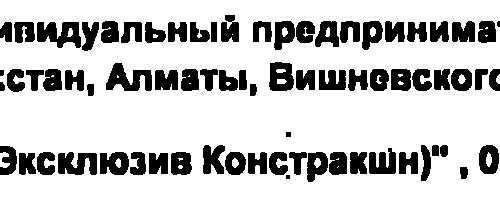

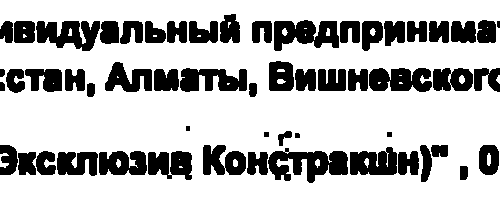

In [ ]:
ret, thresh180 = cv2.threshold(imageERO, 180, 255, cv2.THRESH_BINARY)
ret, thresh200 = cv2.threshold(imageERO, 200, 255, cv2.THRESH_BINARY)
ret, thresh230 = cv2.threshold(imageERO, 230, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh180)
cv2_imshow(thresh200)
cv2_imshow(thresh230)

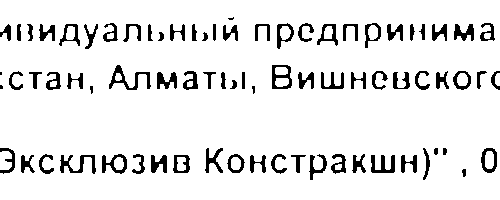

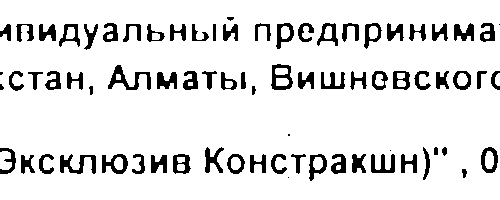

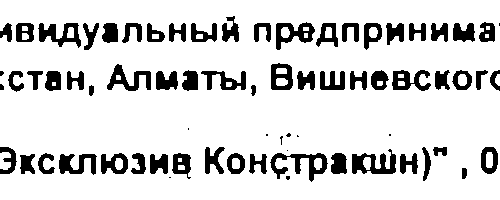

In [ ]:
ret, thresh180 = cv2.threshold(imageDIL_in_ero, 180, 255, cv2.THRESH_BINARY)
ret, thresh200 = cv2.threshold(imageDIL_in_ero, 200, 255, cv2.THRESH_BINARY)
ret, thresh230 = cv2.threshold(imageDIL_in_ero, 230, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh180)
cv2_imshow(thresh200)
cv2_imshow(thresh230)

# Две функции предобработки , которые понравились

imageERO = cv2.erode(thresh180, kernel2)

ret, thresh180 = cv2.threshold(imageERO, 180, 255, cv2.THRESH_BINARY)

In [ ]:
# Две функции предобработки , которые понравились
def thresh_ero (image, thr,kernel):
  ret, thresh180 = cv2.threshold(image, thr, 255, cv2.THRESH_BINARY)
  imageERO = cv2.erode(thresh180, kernel)
  return imageERO
def ero_thresh (image, thr,kernel):
  imageERO = cv2.erode(image, kernel)
  ret, thresh180 = cv2.threshold(imageERO, thr, 255, cv2.THRESH_BINARY)

  return thresh180


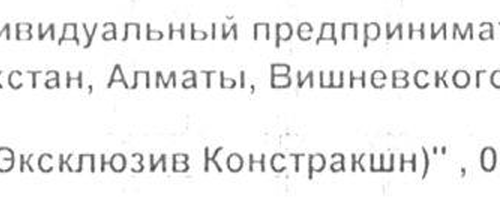

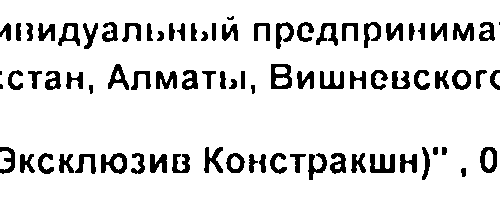

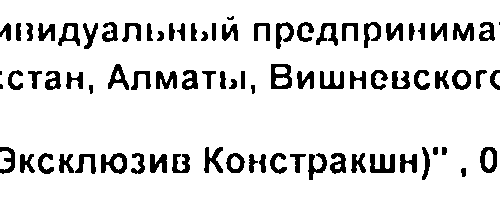

In [ ]:
thr=180
kernel = np.full((2, 2), -1, np.uint8)
im = image[1100:1300, 1000:1500]
im1 = thresh_ero (im, thr,kernel)
im2 = ero_thresh (im, thr,kernel)
cv2_imshow(im)
cv2_imshow(im1)
cv2_imshow(im2)
cv2.destroyAllWindows()

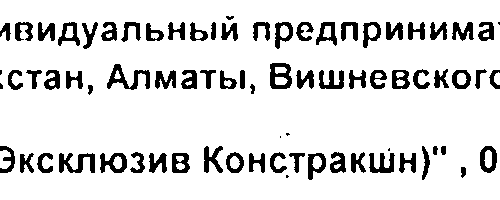

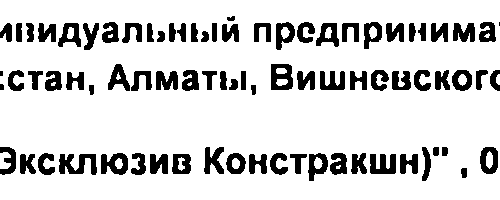

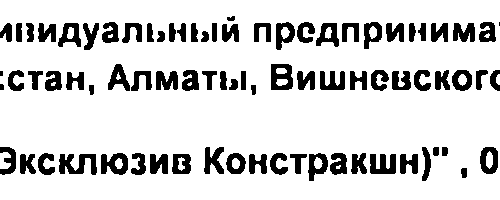

In [ ]:
ret, thresh180 = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)
imageERO1 = cv2.erode(im1, kernel)
imageERO2 = cv2.erode(im2, kernel)
cv2_imshow(thresh180)
cv2_imshow(imageERO1)
cv2_imshow(imageERO2)
cv2.destroyAllWindows()

Если просто использовать cv2.THRESH_BINARY то остается мусор , во втором случае в некоторых буквах разрывы

## получение контуров

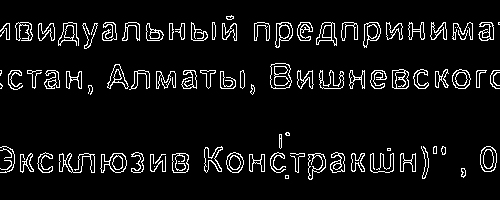

In [ ]:
# получение контуров
edge = cv2.Canny(im, 50, 200, None, 3)

# вывод на экран
cv2_imshow(edge)

Начальное изображение


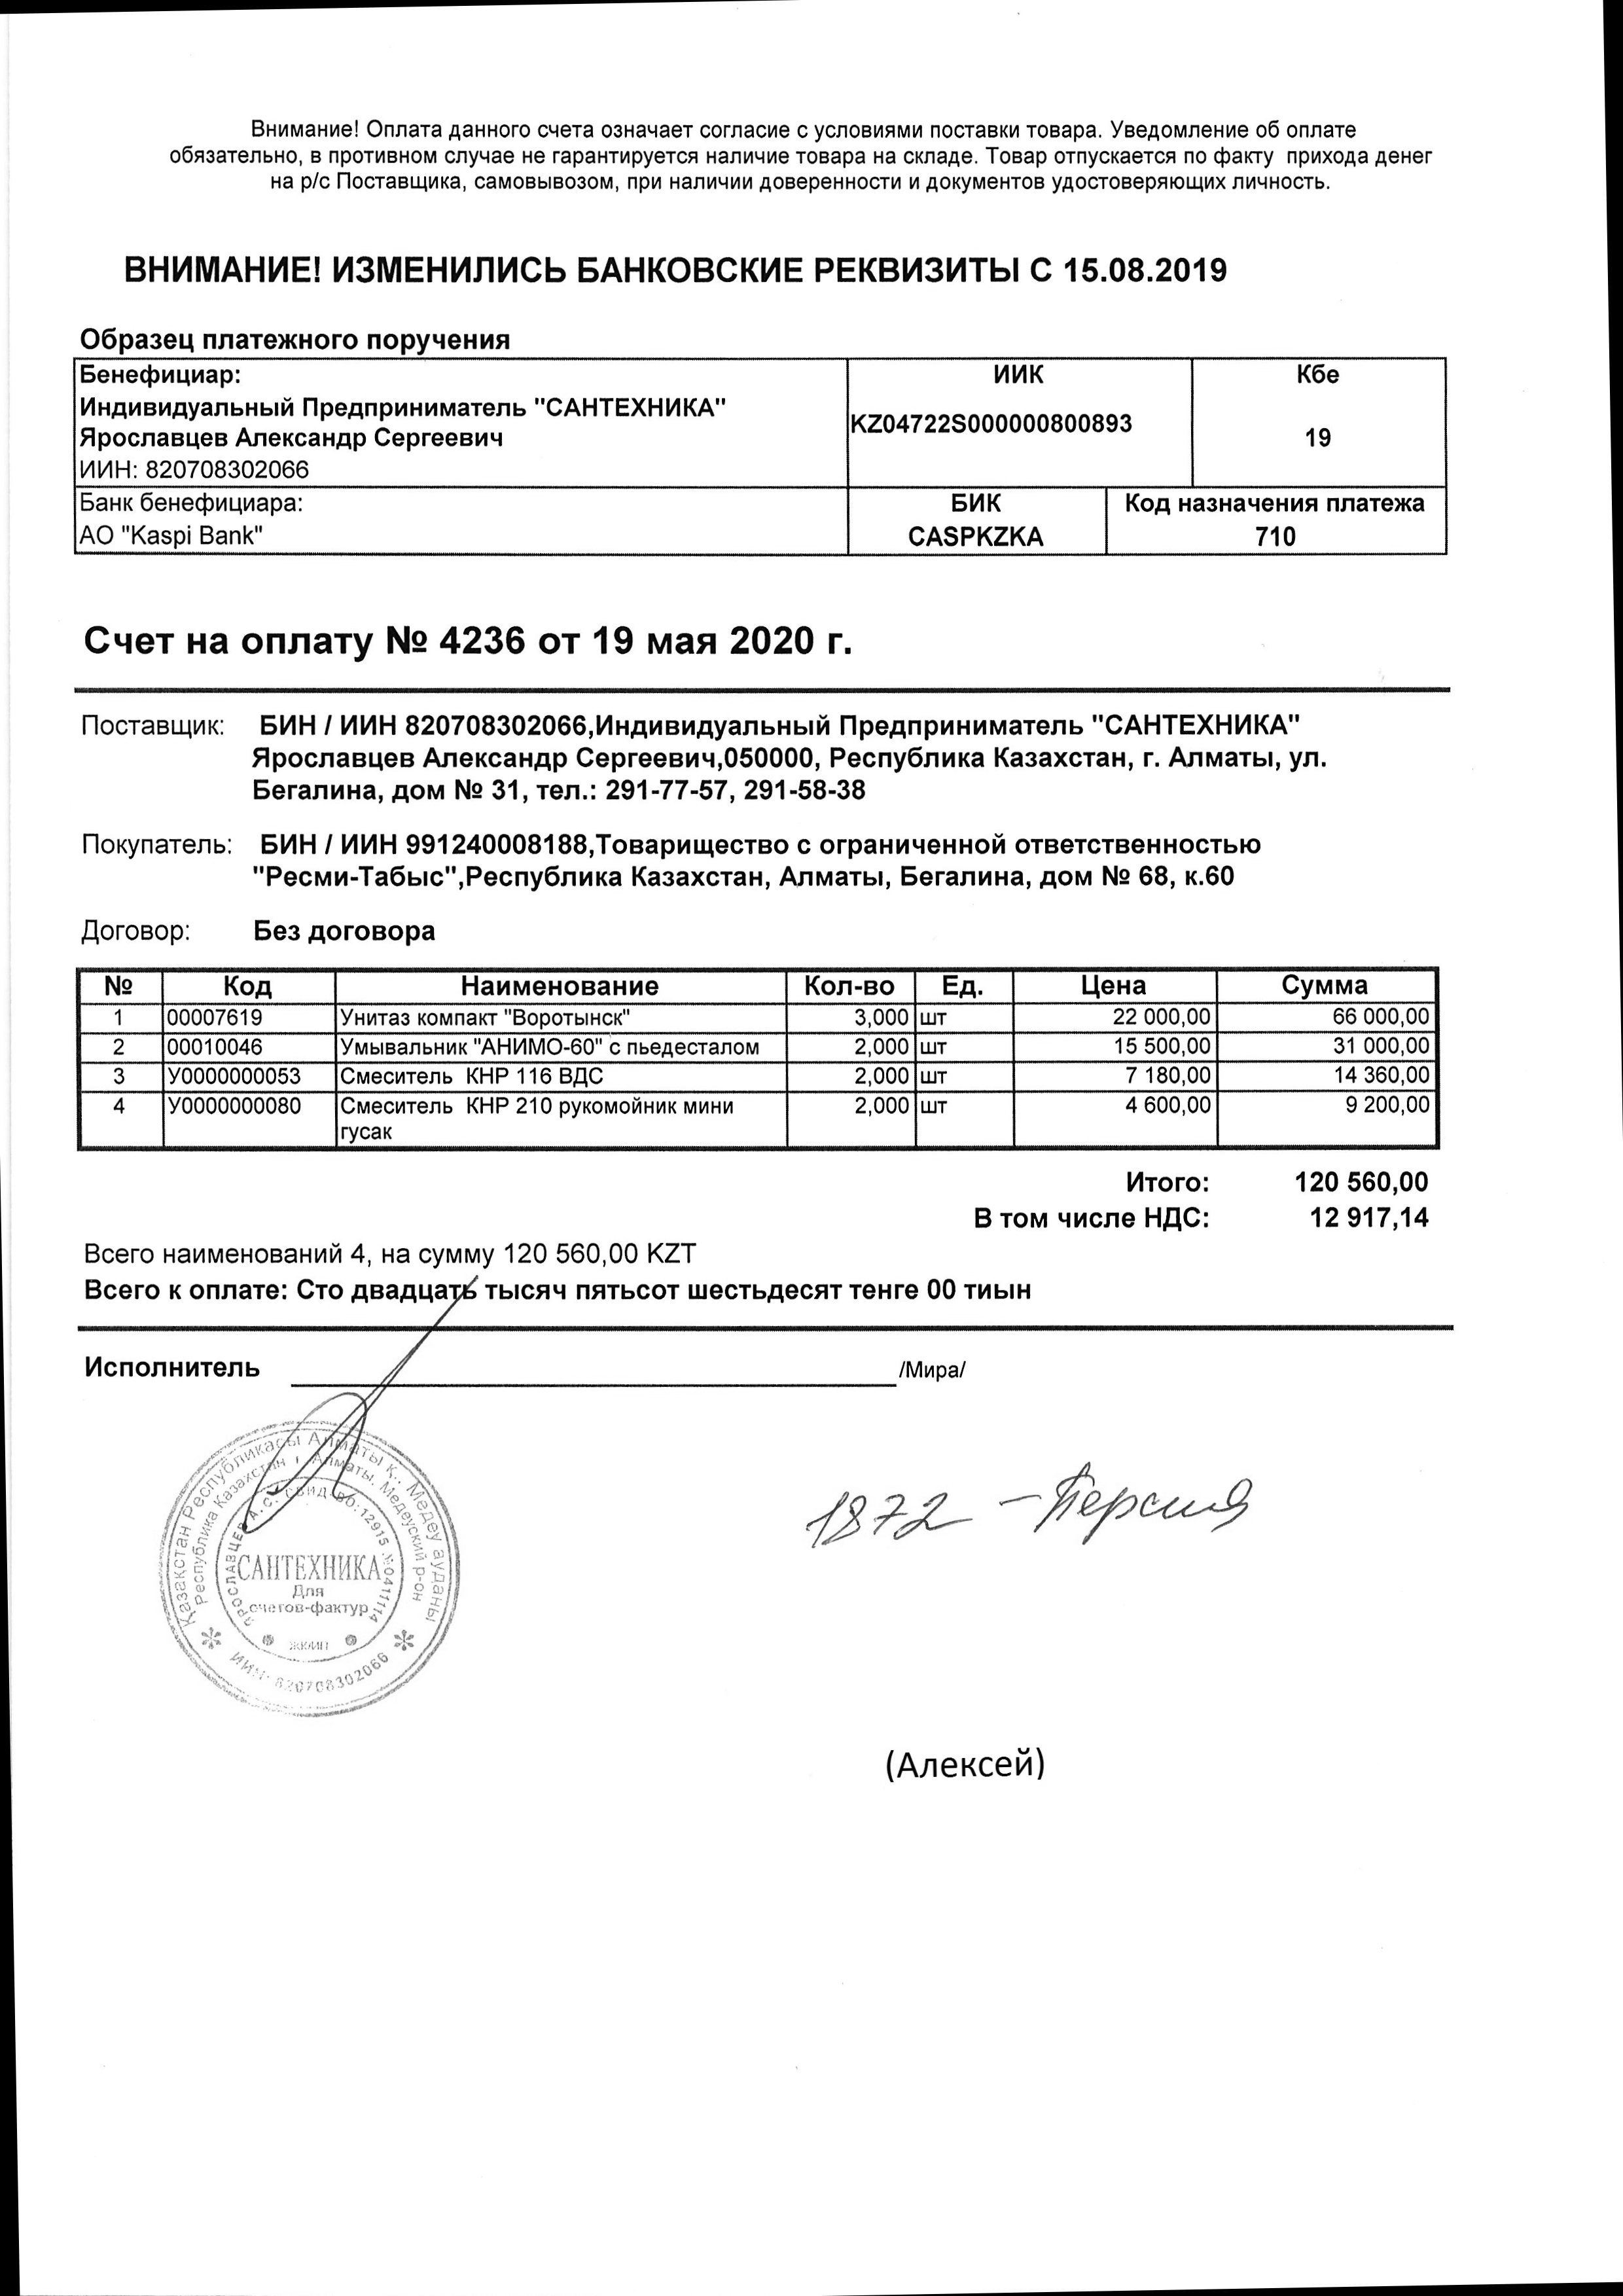

Пороги потом эрозия


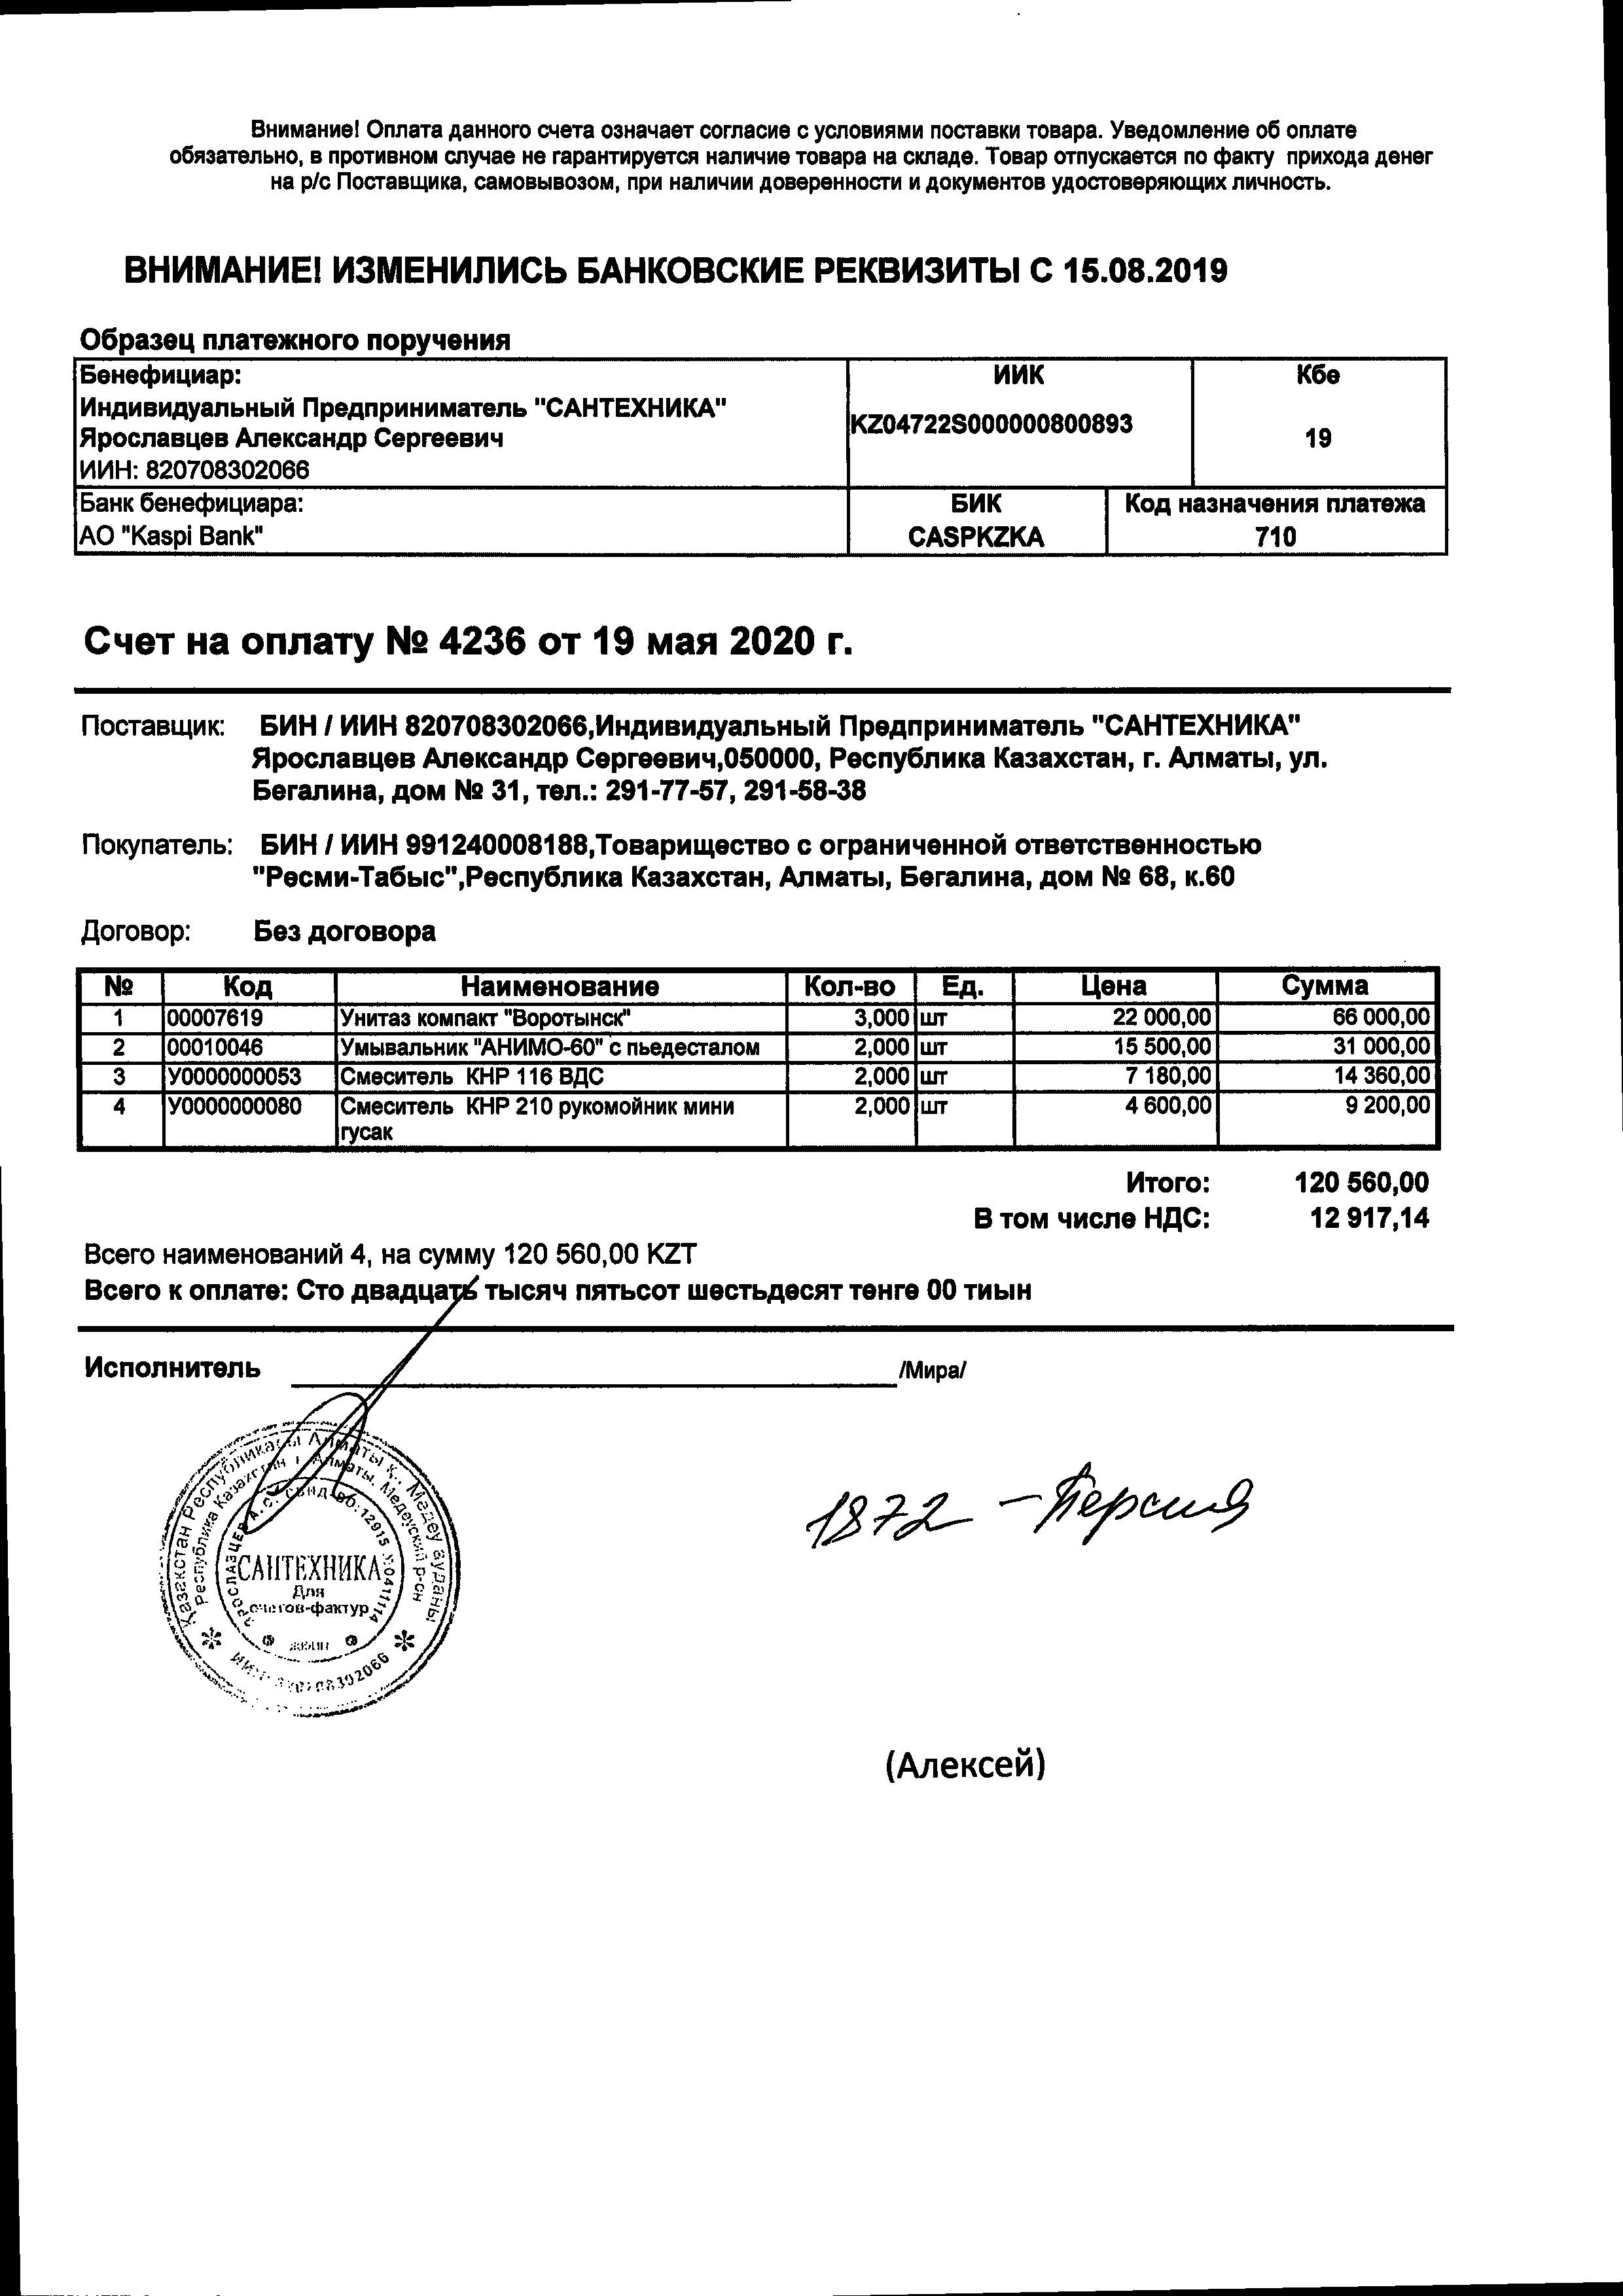

Эрозия потом пороги


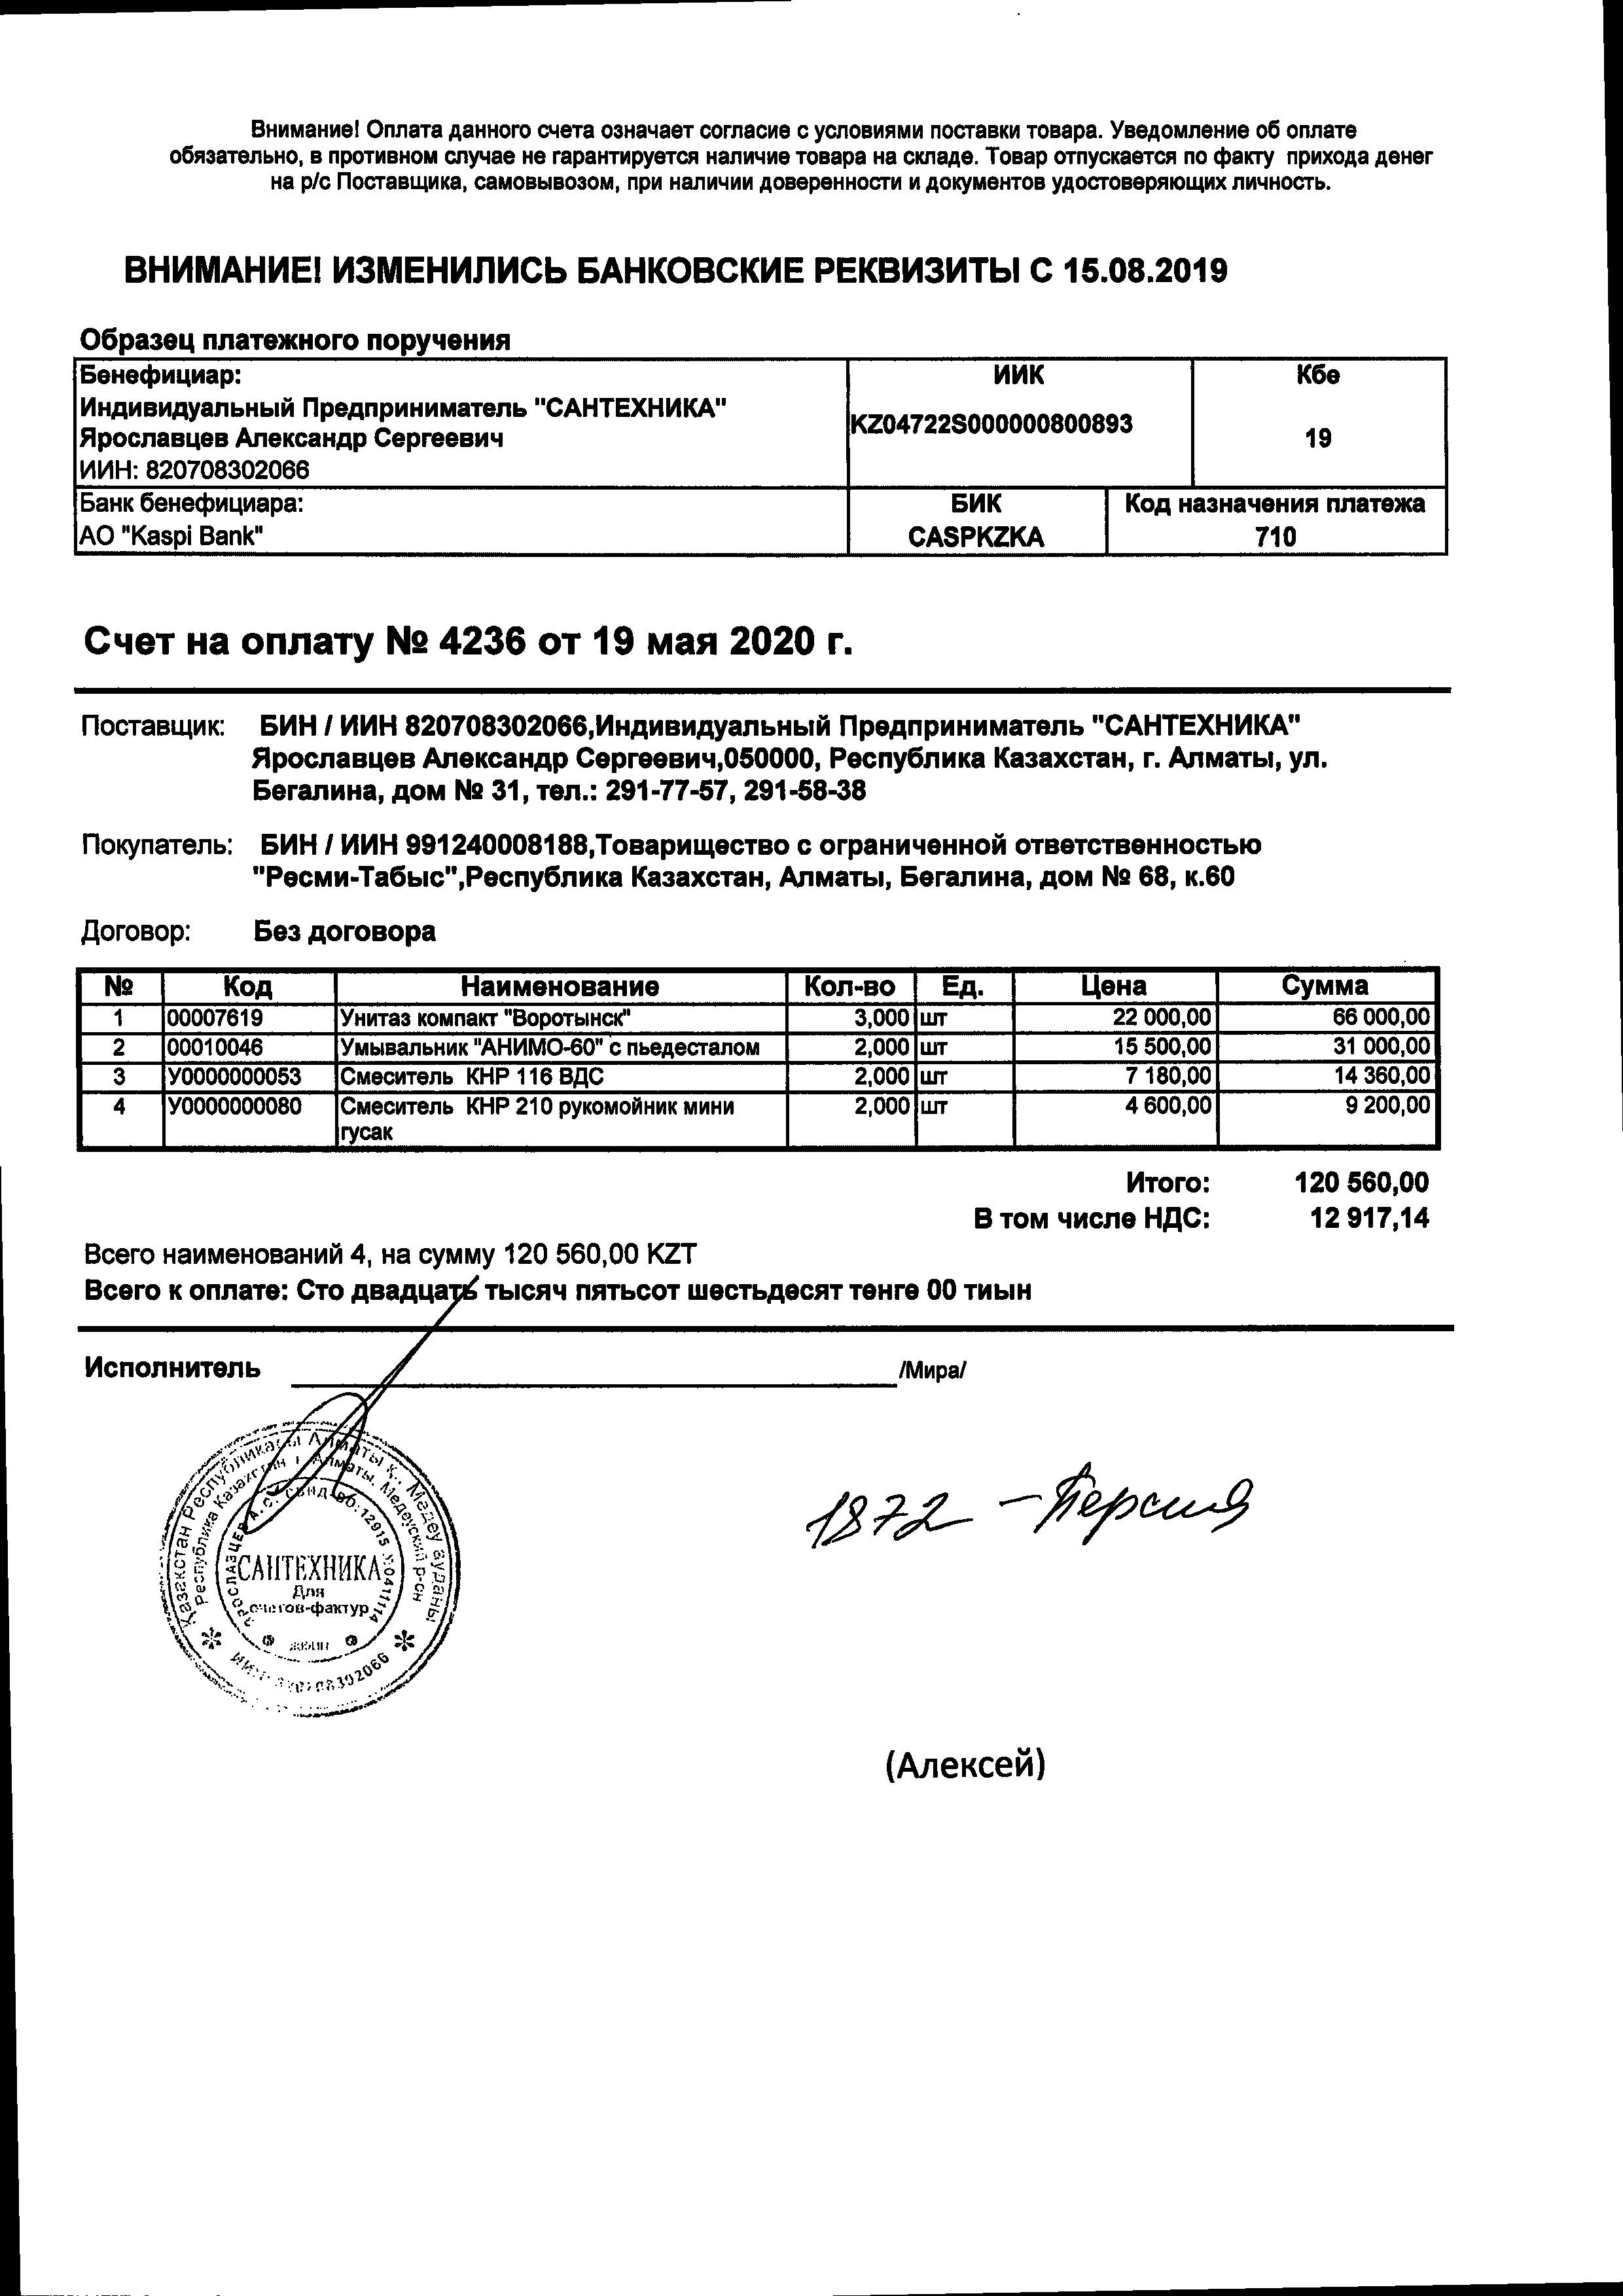

просто Пороги


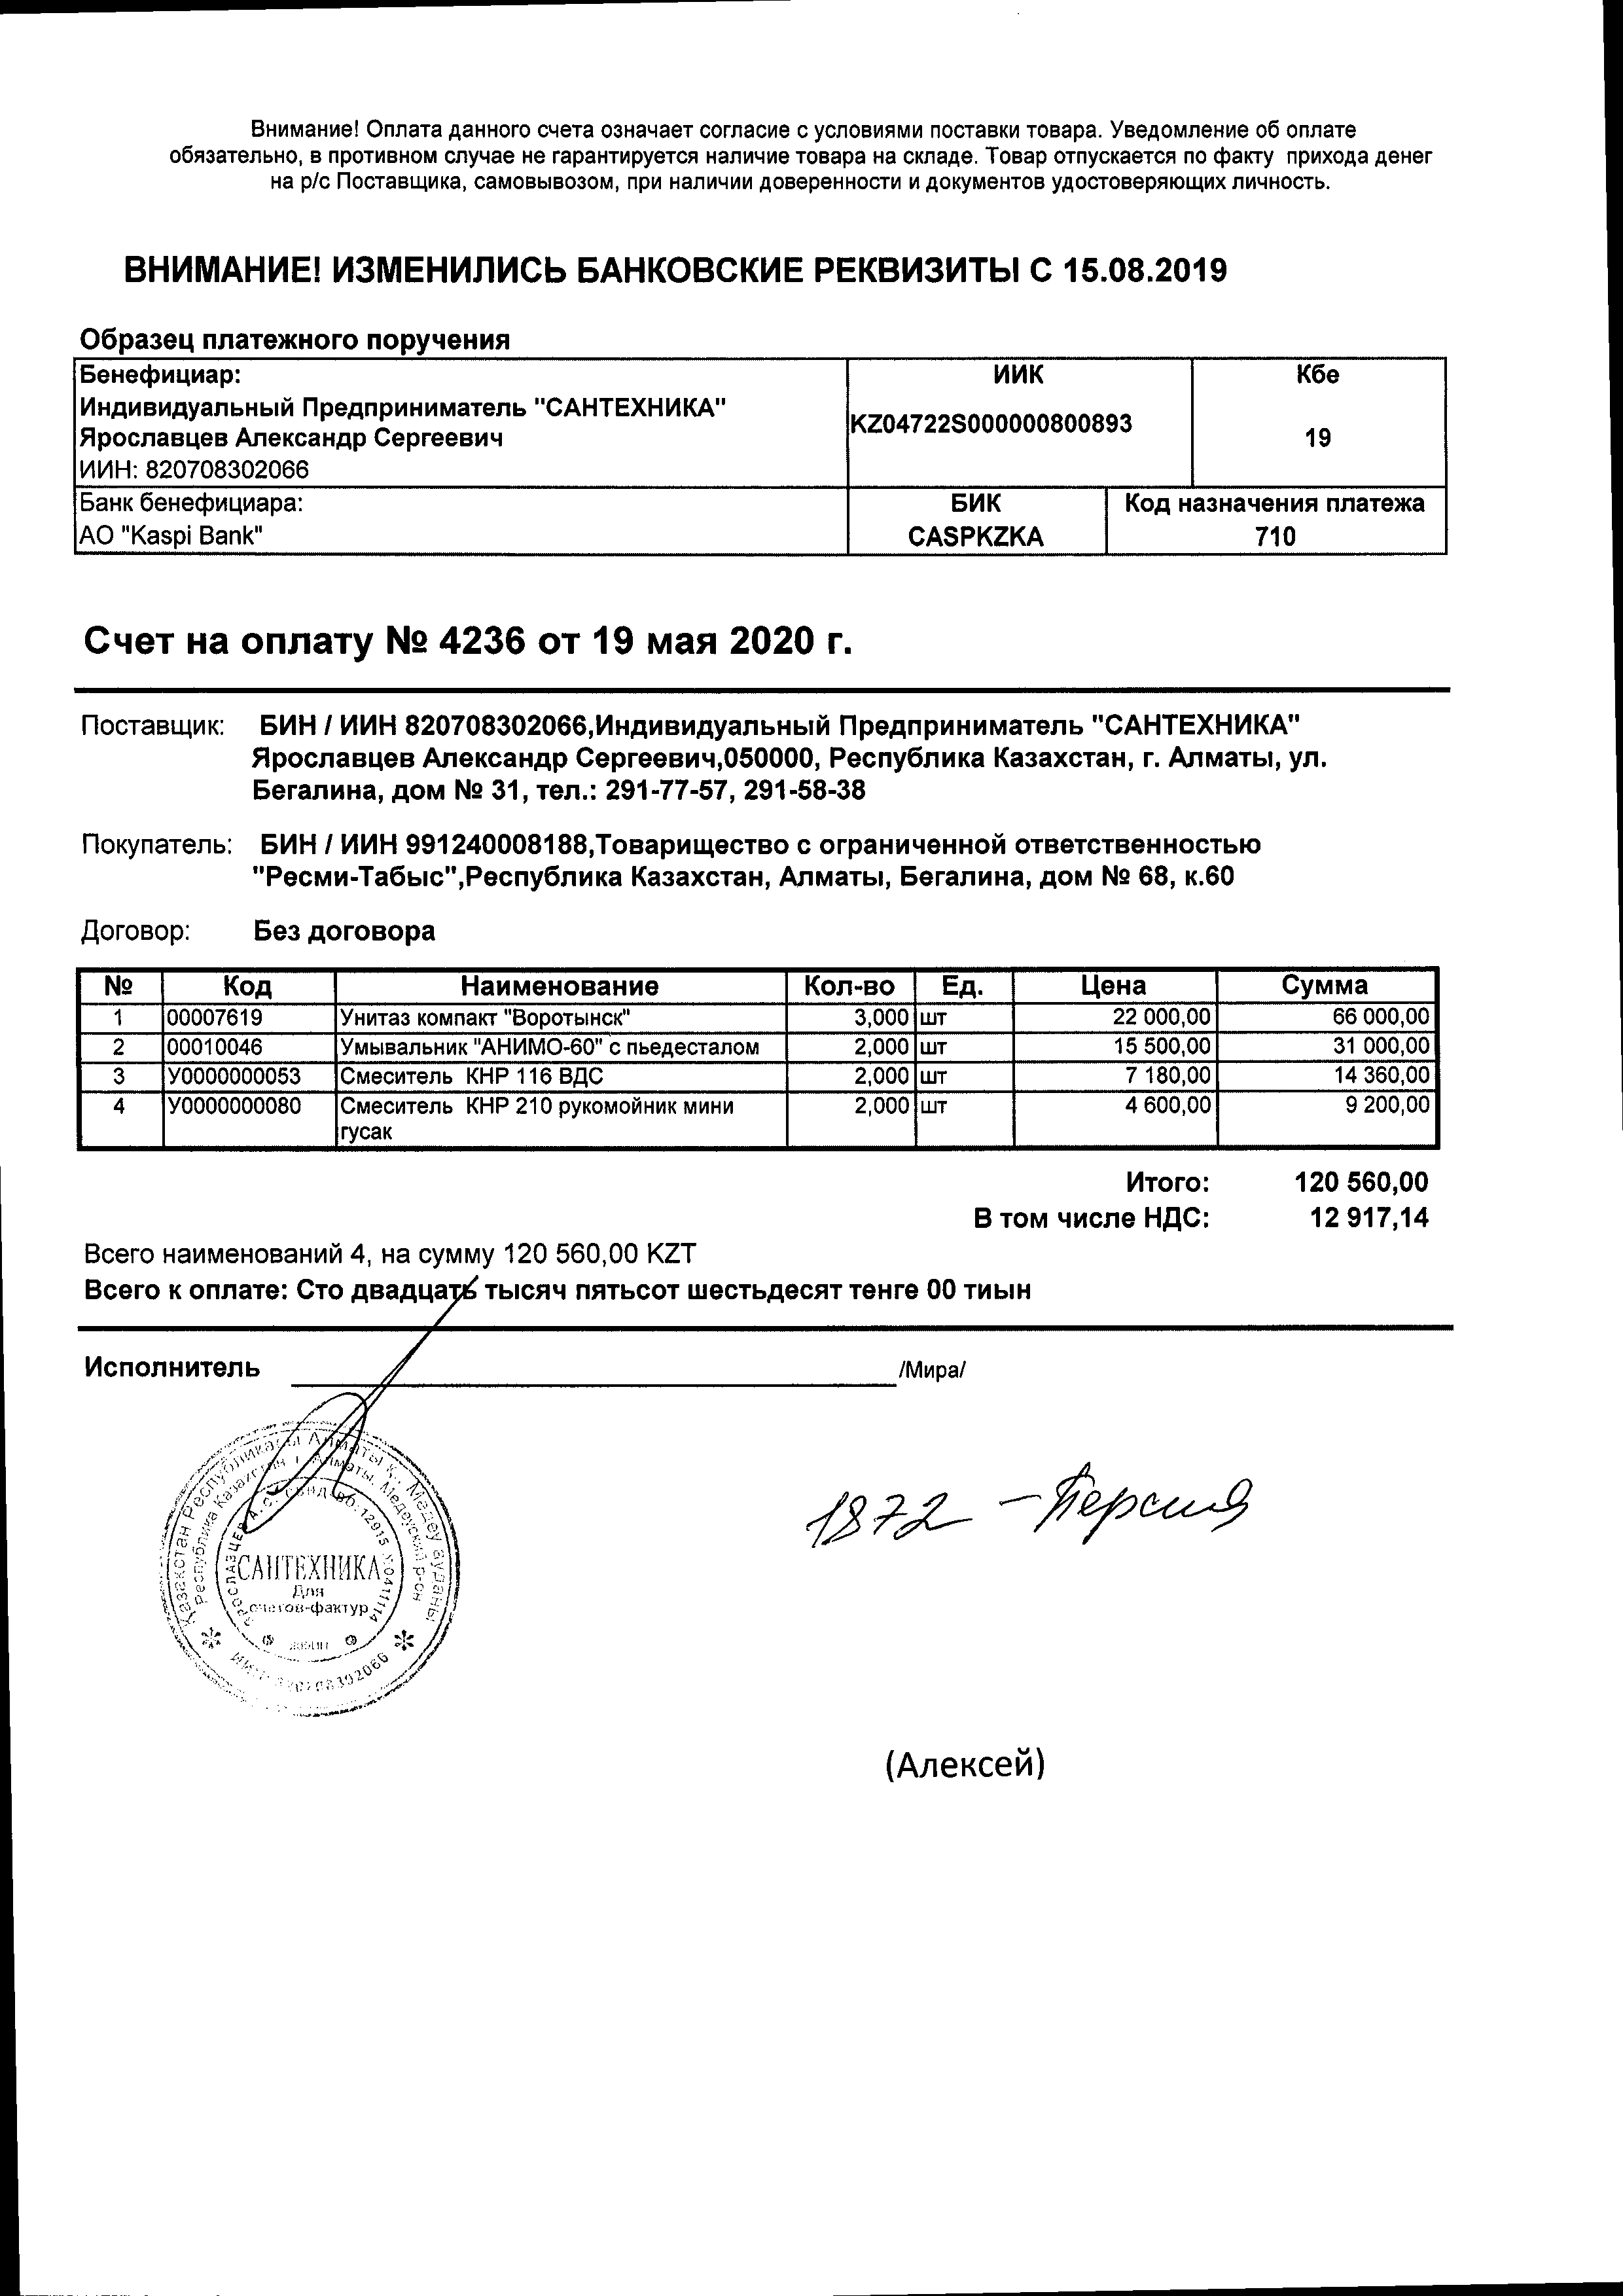

In [ ]:
img = cv2.imread('/content/img/3082.png', cv2.IMREAD_GRAYSCALE)# Начальное изображение

thr=180
kernel = np.full((2, 2), 1, np.uint8)

# img = img[1100:1300, 1000:1500]
# img = cv2.dilate(img,kernel)
im1 = thresh_ero (img, thr,kernel)
im2 = ero_thresh (img, thr,kernel)
ret, thresh180 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
print('Начальное изображение')
cv2_imshow(img)
print('Пороги потом эрозия')
cv2_imshow(im1)
print('Эрозия потом пороги')
cv2_imshow(im2)
ret, thresh180 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)


print('просто Пороги')
cv2_imshow(thresh180)
cv2.destroyAllWindows()